<a href="https://colab.research.google.com/github/VARSHAG16/BHARAT_INTERN_HandwrittenNumberRecognition/blob/main/BHARATHINTERN_MNISTnumberclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

**DATA**

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**VISUALIZE EXAMPLES**

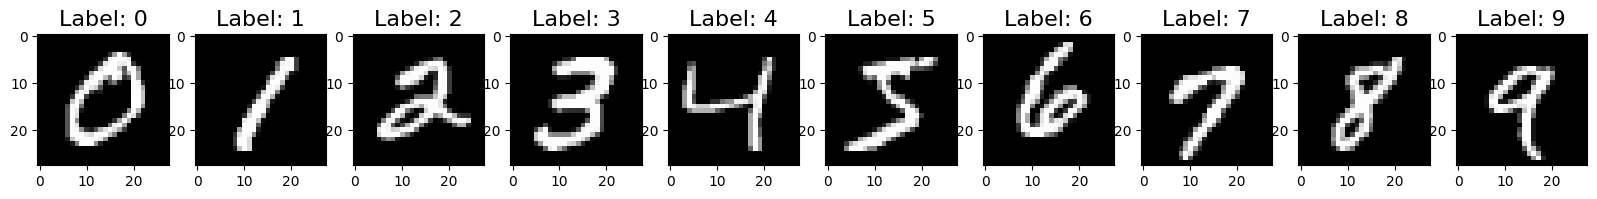

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])
  

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])
     

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**PREPARE DATA**

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0
     

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)
     

(60000, 784)


**CREATE MODEL-Fully Connected Neural Network**

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**TRAIN**

In [ ]:
batch_size = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1229 - accuracy: 0.9640
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1012 - accuracy: 0.9707
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0734 - accuracy: 0.9780
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0666 - accuracy: 0.9799
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0586 - accuracy: 0.9825
Epoch 7/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0509 - accuracy: 0.9847
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0462 - accuracy: 0.9857
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0418 - accuracy: 0.9871
Epoch 10/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0351 - accuracy: 0.989

**EVALUATE**

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))
     

313/313 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9802
Test Loss: 0.06880611181259155, Test Accuracy: 0.9801999926567078


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 949us/step
[[1.6734552e-07 4.2862329e-08 5.8956512e-06 ... 9.9988788e-01
  1.0267401e-07 3.4539826e-06]
 [6.2873603e-08 3.4596287e-05 9.9995857e-01 ... 2.1553637e-09
  1.5746392e-07 2.3776370e-10]
 [5.2373375e-06 9.9835831e-01 1.0186707e-04 ... 9.5007429e-04
  2.1405864e-04 3.4080669e-05]
 ...
 [2.8218595e-12 2.2247437e-11 4.8599705e-12 ... 5.8140205e-07
  9.3387733e-09 7.9468036e-06]
 [2.2018214e-09 6.5152869e-11 2.3858979e-11 ... 5.6215015e-11
  7.5996677e-06 4.8203046e-09]
 [2.2169200e-09 8.4172919e-13 1.0211719e-10 ... 9.1207250e-13
  1.1380582e-12 3.4099717e-14]]
[7 2 1 ... 4 5 6]


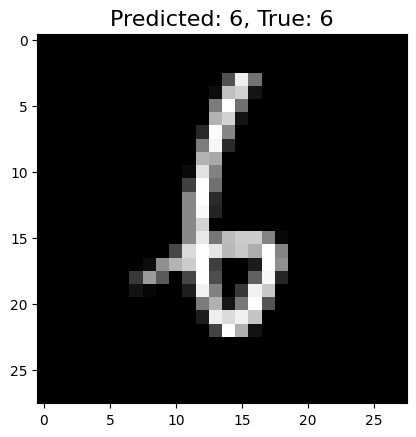

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')
     

**CONFUSION MATRIX**

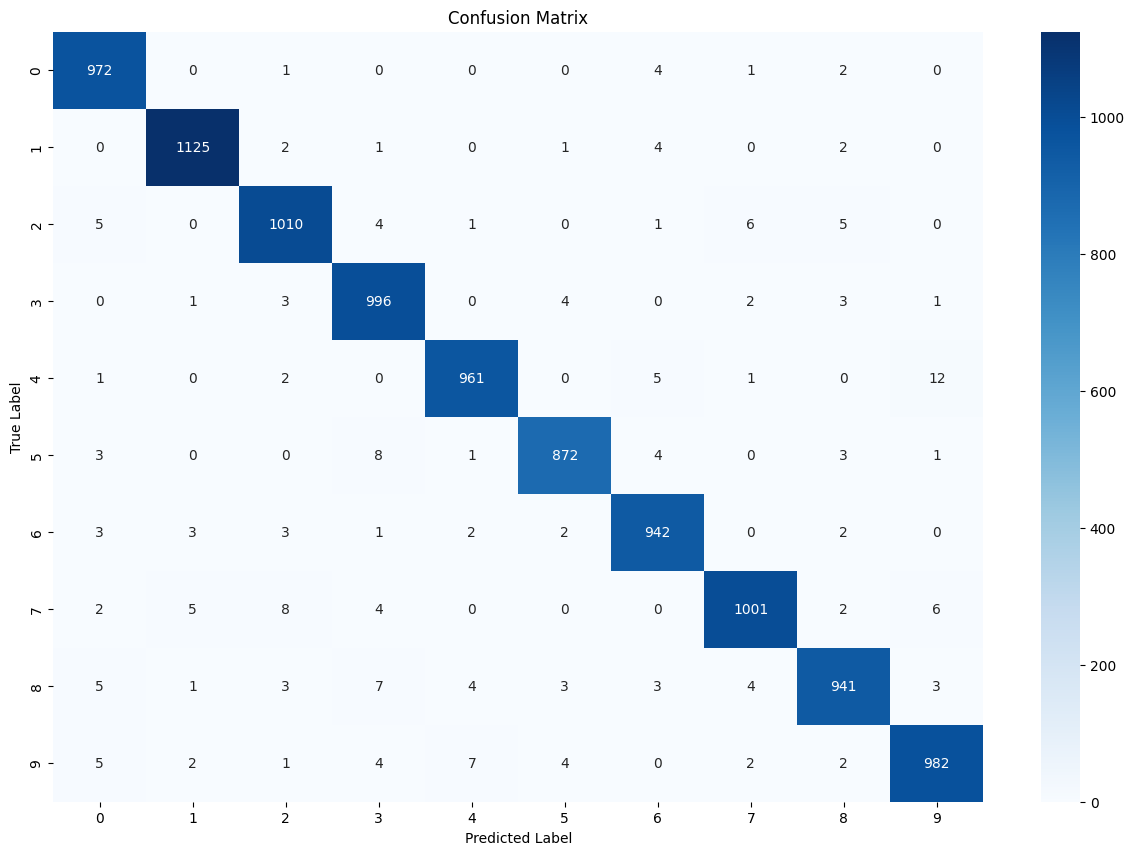

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

**INVESTIGATE SOME ERRORS**

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]
     

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

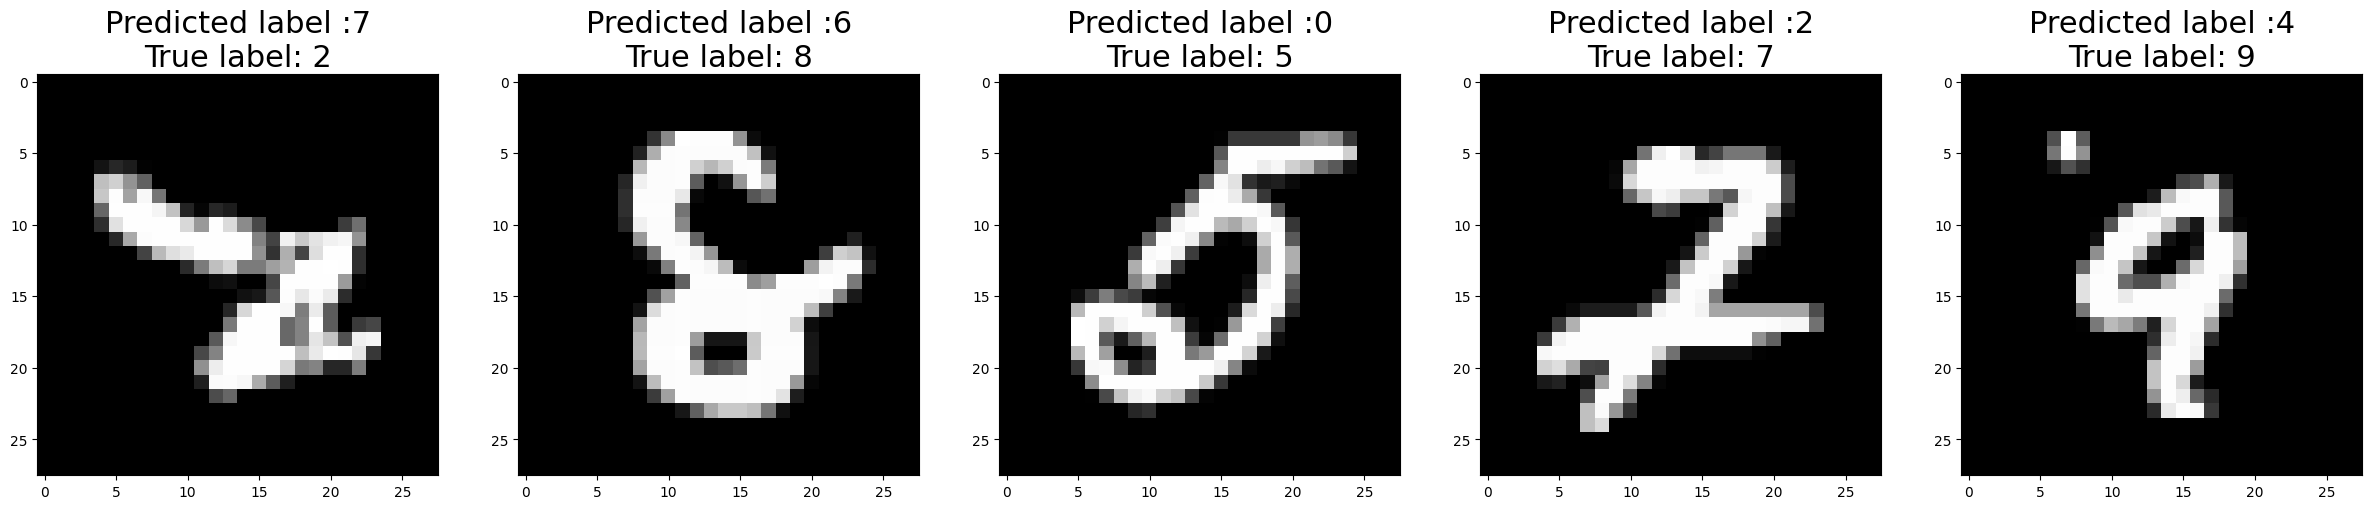

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
     